In [1]:
import torch, os
import matplotlib.pyplot as plt, numpy as np
from mlflow_helper import load_attack_results, load_from_db

In [2]:
baseline_run_names = [1668278459, 1668279489, 1668283177, 1668284221, 1668289478,
            1668296690, 1668302862, 1668309303, 1668319357, 1668343081, 1668361949,
            1667820145, 1667706428, 1667745011, 1667634222, 1667729890, 1667599289]

S2CNN_run_names = [1668559990, 1668568059, 1668578286, 1668598496, 1668637573, 1668139362, 1668030960]

In [3]:
baseline_success_rate = torch.stack([load_attack_results(run_name, 'LinfRandomSearch', 'success_rate.pickle') for run_name in baseline_run_names])
baseline_params = load_attack_results(baseline_run_names[0], 'LinfRandomSearch', 'params.pickle')
baseline_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in baseline_run_names]
baseline_total_params = [load_from_db(run_name, 'params.total_params') for run_name in baseline_run_names]

S2CNN_success_rate = [load_attack_results(run_name, 'LinfRandomSearch', 'success_rate.pickle') for run_name in S2CNN_run_names]
S2CNN_params = load_attack_results(S2CNN_run_names[0], 'LinfRandomSearch', 'params.pickle')
S2CNN_clean_test_accs = [load_from_db(run_name, 'metrics.test_acc') for run_name in S2CNN_run_names]
S2CNN_total_params = [load_from_db(run_name, 'params.total_params') for run_name in S2CNN_run_names]

In [4]:
print(baseline_params, '\n')
print(baseline_success_rate.size())

{'epsilons': [0, 0.1, 0.25, 0.5, 1, 3, 5, 7.5, 10, 20, 50, 100]} 

torch.Size([17, 12])


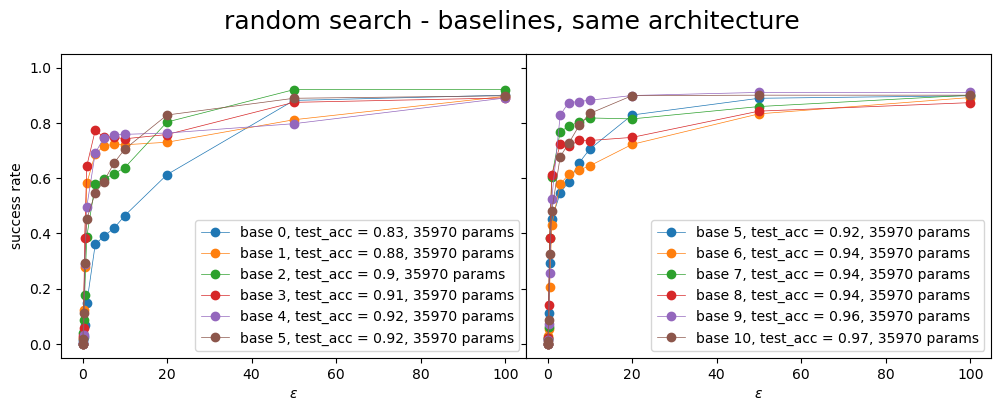

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (12, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('random search - baselines, same architecture', fontsize=18)
plt.subplots_adjust(top=0.87)

for i in range(6):
    axs[0].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
axs[0].set_xlabel('$\epsilon$')
axs[0].set_ylabel('success rate')
    
for i in range(5,11):
    axs[1].plot(baseline_params['epsilons'], baseline_success_rate[i], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
axs[1].set_xlabel('$\epsilon$')

for j in range(2):
    axs[j].legend()
    
axs[0].set_ylim(-0.05,1.05)

# plt.savefig('random_search_bl_same_arch.pdf', bbox_inches="tight")
plt.show()

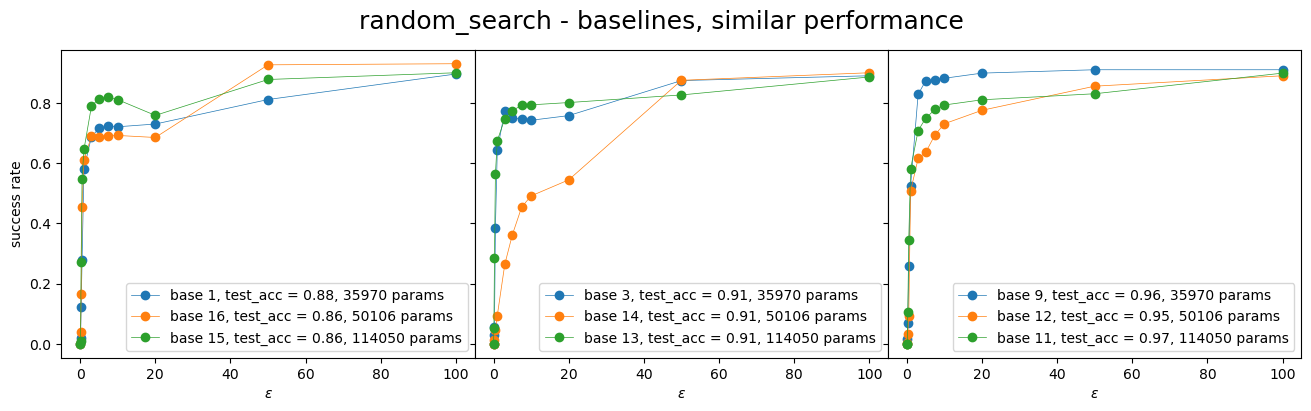

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (16, 4), sharey=True, gridspec_kw={'wspace':0, 'hspace':0})
plt.suptitle('random_search - baselines, similar performance', fontsize=18)
plt.subplots_adjust(top=0.88)

for i in [1, 16, 15]:
    axs[0].plot(baseline_params['epsilons'][:], baseline_success_rate[i][:], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
axs[0].set_xlabel('$\epsilon$')
axs[0].set_ylabel('success rate')

for i in [3, 14, 13]:
    axs[1].plot(baseline_params['epsilons'][:], baseline_success_rate[i][:], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
axs[1].set_xlabel('$\epsilon$')

for i in [9, 12, 11]:
    axs[2].plot(baseline_params['epsilons'][:], baseline_success_rate[i][:], 'o-', linewidth=0.5, label=f"base {i}, test_acc = {baseline_clean_test_accs[i]:.{2}}, {baseline_total_params[i]} params")
axs[2].set_xlabel('$\epsilon$')

for j in range(3):
    axs[j].legend()

# plt.savefig('random_search_bl_sim_perf.pdf', bbox_inches="tight")
plt.show()

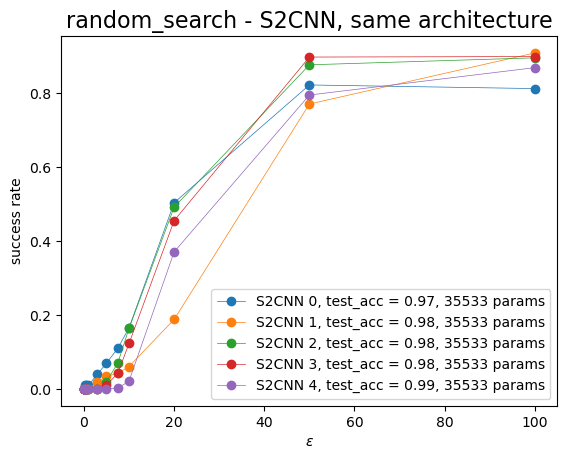

In [10]:
plt.title('random_search - S2CNN, same architecture', fontsize=16)
for i in range(5):
    plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('random_search_S2CNN_same_arch.pdf', bbox_inches="tight")
plt.show()

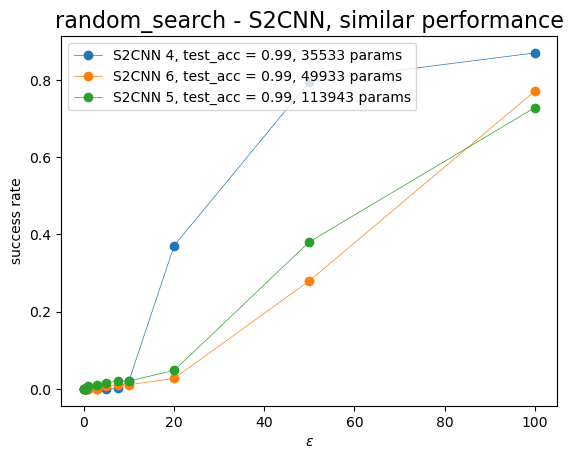

In [8]:
plt.title('random_search - S2CNN, similar performance', fontsize=16)
for i in [4,6,5]:
    plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[i], 'o-', linewidth=0.5, label=f"S2CNN {i}, test_acc = {S2CNN_clean_test_accs[i]:.{2}}, {S2CNN_total_params[i]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('random_search_S2CNN_sim_perf.pdf', bbox_inches="tight")
plt.show()

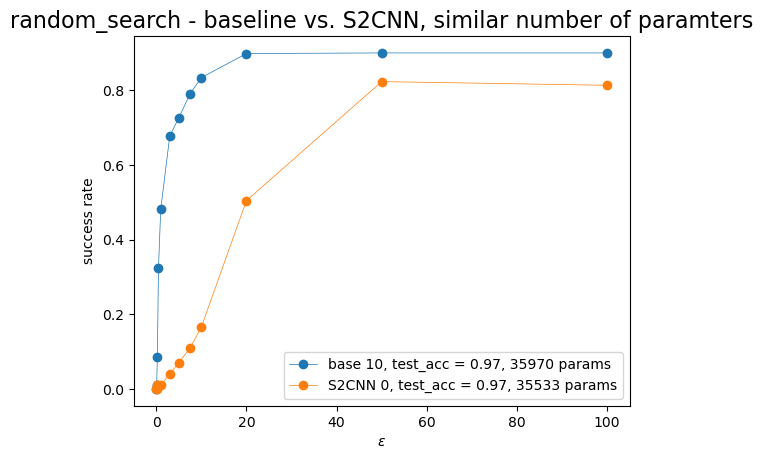

In [9]:
plt.title('random_search - baseline vs. S2CNN, similar number of paramters', fontsize=16)
plt.plot(baseline_params['epsilons'], baseline_success_rate[10], 'o-', linewidth=0.5, label=f"base {10}, test_acc = {baseline_clean_test_accs[10]:.{2}}, {baseline_total_params[10]} params")
plt.plot(S2CNN_params['epsilons'], S2CNN_success_rate[0], 'o-', linewidth=0.5, label=f"S2CNN {0}, test_acc = {S2CNN_clean_test_accs[0]:.{2}}, {S2CNN_total_params[0]} params")
plt.xlabel('$\epsilon$')
plt.ylabel('success rate')
plt.legend()
# plt.savefig('random_search_bl_vs_S2CNN_sim_params.pdf', bbox_inches="tight")
plt.show()